In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
from datetime import datetime
import pandas as pd
import numpy as np
from analyse_timeseries import aggregate_timeline
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
/home/angela/anaconda3/envs/coral_datadownload/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [5]:
#ts = key.strftime('%Y-%m-%d')
date_str = '2018-04-22'
date =datetime.strptime(date_str, '%Y-%m-%d')
date
type(date)

datetime.datetime

In [5]:
dates = ['2018-01-01', '2018-04-22', '2018-09-09']
pd.to_datetime(dates, format='%Y-%m-%d', errors='raise') #errors='coerce' will coerce these entries to NaTs

DatetimeIndex(['2018-01-01', '2018-04-22', '2018-09-09'], dtype='datetime64[ns]', freq=None)

In [6]:
time = '2020-04-10 16:05:11.024'


In [16]:
dates, values = aggregate_timeline('', 'spm_nechad2016')
print(f"stacked values dim: {values.shape}")

# output running
#i,j = get_index_for_timeseries(values)
#### 12,1274 ####

i = 120
j = 124
#To pick a timeseries slice: values[:,i,j]
print(f"time series values dim: {values[:,i,j].shape}")
print(values[:,i,j])

stacked values dim: (23, 2946, 2718)
time series values dim: (23,)
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan]


In [25]:
ts = values[:,12,1274]
print(ts.shape)
#npa = np.asarray(someListOfLists, dtype=np.float32)
#npa = np.asarray(dates)
data = np.stack((dates, ts), axis=1)
print(data.shape)

(23,)
(23, 2)


In [26]:
index = pd.DatetimeIndex(dates)
data = pd.Series(ts, index=index)

In [27]:
data.describe()

count    22.000000
mean      3.457110
std       1.584089
min       1.586958
25%       2.280037
50%       3.154334
75%       3.739403
max       8.055892
dtype: float64

In [28]:
%matplotlib inline
import seaborn; seaborn.set()

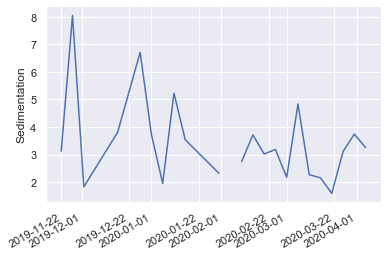

In [29]:
data.plot()
plt.ylabel('Sedimentation');

<function numpy.sort(a, axis=-1, kind=None, order=None)>

In [39]:
month = data.resample('M').sum()

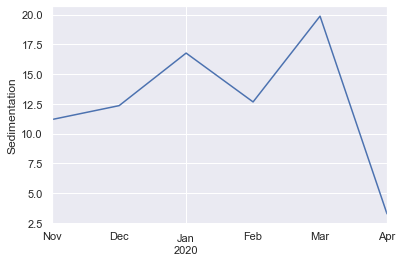

In [40]:
month.plot()
plt.ylabel('Sedimentation');

In [15]:
month

2019-11-30    11.180296
2019-12-31    12.343840
2020-01-31    16.760759
2020-02-29    12.655151
2020-03-31    19.865485
2020-04-30     3.250880
Freq: M, dtype: float64

In [18]:
import trend_analysis_nasa

In [22]:
spm_rate = trend_analysis_nasa.trend()

number of products used for time analysis: 23
tru_all dim: (23, 2946, 2718)
index i: 0
index i: 100
index i: 200
index i: 300
index i: 400
index i: 500
index i: 600
index i: 700
index i: 800
index i: 900
index i: 1000
index i: 1100
index i: 1200
index i: 1300
index i: 1400
index i: 1500
index i: 1600
index i: 1700
index i: 1800
index i: 1900
index i: 2000
index i: 2100
index i: 2200
index i: 2300
index i: 2400
index i: 2500
index i: 2600
index i: 2700
finished


In [23]:
print(spm_rate.shape)

(2946, 2718)


In [24]:
print(f"min: {np.nanmin(spm_rate)}, max: {np.nanmax(spm_rate)}, median:{np.nanmedian(spm_rate)}, mean:{np.nanmean(spm_rate)}")

min: nan, max: nan, median:nan, mean:nan


/home/angela/anaconda3/envs/coral_datadownload/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: All-NaN slice encountered
  """Entry point for launching an IPython kernel.
/home/angela/anaconda3/envs/coral_datadownload/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1116: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
/home/angela/anaconda3/envs/coral_datadownload/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import ListedColormap

In [ ]:
def load_colormap(filename):
    try:
        color_map_values = pd.read_csv(filename).to_numpy()/255.
        colormap = ListedColormap(color_map_values)
    except IOError:
        print(f"Cannot load colormap {filename}")
        raise
    colormap.set_bad("gray") # color of missing pixels
    colormap.set_under("black") # color of background, necessary if you want to use
    # this colormap directly with hp.mollview(m, cmap=colormap)
    # healpy tutorial see:https://healpy.readthedocs.io/en/latest/tutorial.html
    return colormap